Доклад по дисциплине «Компьютерное моделирование прикладных задач»

# Прогнозирование временных рядов с использованием RNN и дифференциальных уравнений

Студент: Вихляев Е.С., кафедра фундаментальной математики

Преподаватель: Митин В.Ю., кафедра фундаментальной математики

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-06-27 11:16:34.206326: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Определение функции системы дифференциальных уравнений
def diff_eq(t, y, a11, a12, a21, a22):
    dy1 = a11 * y[0] + a12 * y[1]
    dy2 = a21 * y[0] + a22 * y[1]
    return [dy1, dy2]

In [3]:
# Задание параметров
params = (-0.1, 0.2, -0.2, 0.1)
yini = [1, 0]
times = np.linspace(0, 10, 100)

In [4]:
# Решение системы дифференциальных уравнений методом Рунге-Кутты
sol = solve_ivp(lambda t, y: diff_eq(t, y, *params), [0, 10], yini, t_eval=times)
data = np.column_stack((sol.t, sol.y.T))

In [5]:
# Подготовка данных для LSTM
train_data = np.reshape(data[:, 1:], (data.shape[0], 1, data.shape[1]-1))

In [6]:
# Создание модели LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, 2)))
model.add(LSTM(50))
model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam')

/Users/socratis/PycharmProjects/LSTM/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Обучение модели
history = model.fit(train_data, data[:, 1:], epochs=100, batch_size=1, verbose=1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.3978
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0724
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0032
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0025
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7380e-04
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.3158e-04
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.3724e-04
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0309e-04
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8137e-04
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7974e-04
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8400e-04
Epoch 13/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0563e-04
Epoch 14/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8589e-04
Epoch 1

In [8]:
# Прогнозирование
predictions = model.predict(train_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step


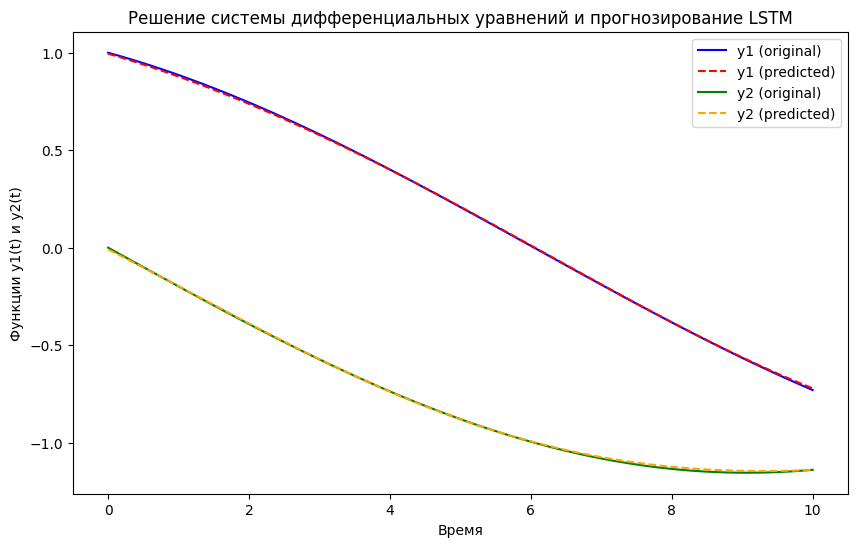

In [9]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(data[:, 0], data[:, 1], color="blue", label="y1 (original)")
plt.plot(data[:, 0], predictions[:, 0], color="red", linestyle="dashed", label="y1 (predicted)")
plt.plot(data[:, 0], data[:, 2], color="green", label="y2 (original)")
plt.plot(data[:, 0], predictions[:, 1], color="orange", linestyle="dashed", label="y2 (predicted)")
plt.title("Решение системы дифференциальных уравнений и прогнозирование LSTM")
plt.xlabel("Время")
plt.ylabel("Функции y1(t) и y2(t)")
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
mae_y1 = mean_absolute_error(data[:, 1], predictions[:, 0])
mae_y2 = mean_absolute_error(data[:, 2], predictions[:, 1])
rmse_y1 = np.sqrt(mean_squared_error(data[:, 1], predictions[:, 0]))
rmse_y2 = np.sqrt(mean_squared_error(data[:, 2], predictions[:, 1]))

In [12]:
print('MAE y_1 = ', mae_y1)
print('MAE y_2 = ', mae_y2)
print('RMSE y_1 = ', rmse_y1)
print('RMSE y_2 = ', rmse_y2)

MAE y_1 =  0.0036368336627955605
MAE y_2 =  0.004164645867341305
RMSE y_1 =  0.004439548863881781
RMSE y_2 =  0.005544029807856257
